# Demo de implementación de un algoritmo de Colonia de Abejas (Bee Algorithm) para resolver el problema de encontrar un Máximo Óptimo  definido al azar en un plano y tratando de esquivar  los máximos locales aleatorios


In [1]:
#@title Cargar librerías
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import operator

import pickle
import codecs

import matplotlib
import matplotlib.pyplot as plt
import networkx
from IPython.display import display
from PIL import Image

import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import ipywidgets as widgets
from ipywidgets import Box, Layout, IntSlider
from ipywidgets import Layout
from IPython.display import clear_output

print("\nLibrerías importadas")


Librerías importadas


In [2]:
#@title PARÁMETROS

#@markdown Parámetros del Espacio  de búsqueda:

# Cantidad de Máximos Locales
CANT_MAXIMOS_LOCALES = 3 #@param {type:"slider", min:0, max:10, step:1}

# Espacio mínimo y máximp del espacio de búsqueda
MIN_ESPACIO_BUSQ = -1000 #@param {type:"slider", min:-1000, max:0, step:5}
MAX_ESPACIO_BUSQ = 1000 #@param {type:"slider", min:0, max:1000, step:10}

#@markdown Parámetros del Algoritmo de Abejas:

# Cantidad de Ciclos de la Corrida
CANT_CICLOS = 100 #@param {type:"integer"}

# Cantidades para  Abejas Exploradoras
CANT_ABEJAS_EXPLORADORAS = 5 #@param {type:"slider", min:1, max:25, step:1}
CANT_MEJORES_ABEJAS_RECLUTAN = 3 #@param {type:"slider", min:1, max:10, step:1}
CANT_ABEJAS_OBRERAS_RECL_ELITE = 5 #@param {type:"slider", min:1, max:20, step:1}
CANT_ABEJAS_OBRERAS_RECL_NORMAL = 2 #@param {type:"slider", min:0, max:10, step:1}

#  Área de las Abejas Exploradoras
RADIO_AREA_EXPLORADORA = 30 #@param {type:"slider", min:1, max:50, step:1}
PORC_RED_AREA_EXPLORADORA = 0.3  #@param {type:"slider", min:0, max:1, step:0.05}
MIN_RADIO_AREA_EXPLORADORA = 5 #@param {type:"slider", min:1, max:100, step:1}


print("\nParámetros de la Corrida definidos")


Parámetros de la Corrida definidos



Clase Mapa de Búqueda definida

> Usando configuración de mapa de búsqueda definida en hash.

> Mapa de búsqueda definido:

** Máximos Generados:  4
  --> [100, 100] {  100  } 
  --> [-500, -500] {  50  } 
  --> [600, 600] {  60  } 
  --> [-111, -111] {  -11  } 

** Posición Máximo Óptimo:  [100, 100]  {  100  } **



> Hash del mapa de búsqueda definido: 
gASVxQAAAAAAAACMCF9fbWFpbl9flIwMTWFwYUJ1c3F1ZWRhlJOUKYGUfZQojAZsaW1NaW6UShj8
//+MBmxpbU1heJRN6AOMB2NhbnRNYXiUSwOMCk1heGltb3NQb3OUXZQoXZQoS2RLZGVdlChKDP7/
/0oM/v//ZV2UKE1YAk1YAmVdlChKkf///0qR////ZWWMCk1heGltb3NWYWyUXZQoS2RLMks8SvX/
//9ljAtNYXhPcHRpbW9JRJRLAIwBWJROjAFZlE6MAVqUTnViLg==


> Gráfico en 2D del Mapa de Búsqueda:


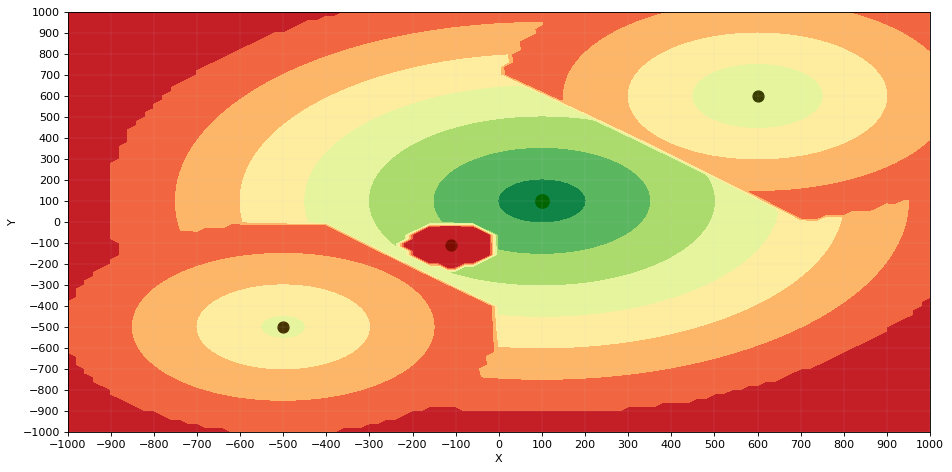

(NOTA: color más ROJO significa PEOR aptitud, y más VERDE es MEJOR aptitud)

> Gráfico en 3D del Mapa de Búsqueda:


Output()

In [3]:
#@title clase MAPA DE BÚSQUEDA
Hash_configuracion_Mapa_Busqueda = "gANjX19tYWluX18KTWFwYUJ1c3F1ZWRhCnEAKYFxAX1xAihYBgAAAGxpbU1pbnEDShj8//9YBgAA AGxpbU1heHEETegDWAcAAABjYW50TWF4cQVLA1gKAAAATWF4aW1vc1Bvc3EGXXEHKF1xCChLZEtk ZV1xCShKDP7//0oM/v//ZV1xCihNWAJNWAJlXXELKEqR////SpH///9lZVgKAAAATWF4aW1vc1Zh bHEMXXENKEtkSzJLPEr1////ZVgLAAAATWF4T3B0aW1vSURxDksAWAEAAABYcQ9OWAEAAABZcRBO WAEAAABacRFOdWIu" #@param {type:"string"}

class MapaBusqueda(object):

    def __init__(self, limMin, limMax, cantMaximosLocales=0):
          self.limMin = limMin
          self.limMax = limMax
          self.cantMax = cantMaximosLocales
          self.X, self.Y, self.Z = None, None, None
          self.generarPosicionesRnd()

    def generarPosicionesRnd(self):
        # Define Posiciones Random para Máximos Locales y Óptimos
        # con Heurística también al Azar (entre 1 y 100)
        # controla que el máximo local/global no se ubique en la misma posición que el Hormiguero
        self.MaximosPos = []
        self.MaximosVal = []
        self.MaxOptimoID = 0
        i = 0
        while len(self.MaximosPos)<(self.cantMax+1):
            # define al azar
            auxPos = [ random.randint(self.limMin, self.limMax),  random.randint(self.limMin, self.limMax) ]
            auxVal = random.randint(-20, 100)
            # asigna
            self.MaximosPos.append( auxPos )
            self.MaximosVal.append( auxVal )
            # determina mejor
            if self.MaximosVal[self.MaxOptimoID] < auxVal:
                self.MaxOptimoID = i
            i = i + 1
        return True

    def printInformacion(self):
        # Muestra la información sobre el Mapa de Búsqueda
        print("\n** Máximos Generados: ", len(self.MaximosPos))
        for auxPos, auxVal in zip(self.MaximosPos, self.MaximosVal):
            print("  -->", auxPos, "{ ", auxVal, " } ")
        print("\n** Posición Máximo Óptimo: ", self.MaximosPos[self.MaxOptimoID], " { ",  self.MaximosVal[self.MaxOptimoID]," } **")
        print("\n")

    @property
    def posMaximos(self):
        return self.MaximosPos

    @property
    def valMaximos(self):
        return self.MaximosVal

    @property
    def posMaximoGlobal(self):
        return self.MaximosPos[self.MaxOptimoID]

    @property
    def valMaximoGlobal(self):
        return self.MaximosVal[self.MaxOptimoID]

    def estaEnMaximo(self, posicion):
      # Indica si la posición corresponde o no a un Máximo
      # si es verdadero devuelve el valor correspondiente, sino 0
      for i in range(len(self.MaximosPos)):
        if posicion==self.MaximosPos[i]:
          return self.MaximosVal[i]
      return 0

    def funcHeuristica(self, posicion, devSinNegativos=True):
        # Define la Función Heurística para evaluar una posicion del mapa
        devHeuristica = None
        minDist = None
        for posMax, valMax in zip(self.MaximosPos, self.MaximosVal):
              # calcula la distancia a la posicion indicada
              sqerrors = ((x - y)**2 for x, y in zip(posicion, posMax))
              distPos =  (math.fsum(sqerrors)**0.5) / 10
              # calcula la heurística correspondiente depende de la distancia
              # y si el valor del máximo es positivo o negativo
              if valMax >= 0:
                auxHeur = max(valMax - distPos, 0)
              else:
                auxHeur = min(valMax + distPos, 0)
              # si tiene heurística definida
              if (auxHeur != 0):
                # determina si es la menor distancia
                # o igual distancia con mayor heurística
                if (minDist is None) or (distPos < minDist) \
                  or ((distPos == minDist) and (devHeuristica < auxHeur)):
                    minDist = distPos
                    devHeuristica = auxHeur
        # Por las dudas controla que este definida y se  un valor positivo
        if devHeuristica is None:
          return 0
        else:
          if devSinNegativos:
            # ajusta la heurística para que no devuelva valores negativos
            # (puede complicar algunos métodos de selección de DEAP)
            return max(devHeuristica, 0)
          else:
            return devHeuristica


    def genDatosGraficos(self):
      if not((self.X is None) or (self.Y is None) or (self.Z is None)):
        # ya está definido, no hace falta re-generarlo
        return
      # define los datos para generar el gráfico
      rSep = (self.limMax-self.limMin)/100
      if rSep < 5:
        rSep = 5
      rX = np.arange(self.limMin, self.limMax+1, rSep)
      rY = np.arange(self.limMin, self.limMax+1, rSep)
      X, Y = np.meshgrid(rX, rY)
      # inicia los valores de aptitud
      Z = np.zeros((X.shape[0], X.shape[1]))
      # completa los valores de aptitud
      for i in range(X.shape[0]):
        for j in range(X.shape[1]):
          Z[i][j] = self.funcHeuristica( [ X[i][j], Y[i][j] ], False )
      #return X, Y, Z
      self.X, self.Y, self.Z = X, Y, Z
      return

    # método que se usa para generar gradiente de colores
    def colorFader(self, c1, c2, mix=0.0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
        c1 = np.array(mpl.colors.to_rgb(c1))
        c2 = np.array(mpl.colors.to_rgb(c2))
        return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

    def genGrafico(self, tipoGraph, fig, mostrarEjes=True):
      es3D = (tipoGraph=="3D")
      # generar los datos X, Y, Z
      self.genDatosGraficos()
      # función que genera el gráfico en 3D
      # Genera el tipo de gráfico
      if es3D:
        ax = fig.add_subplot(111, projection='3d')
        # Surface 3D
        surf = ax.plot_surface(self.X, self.Y, self.Z, cmap=cm.RdYlGn,
                              linewidth=1, antialiased=False)
      else:
        ax = fig.add_subplot(111)
        # Superficie colores 2D (contourf)
        plt.contourf(self.X, self.Y, self.Z,  cmap=cm.RdYlGn)
      # muestra las posiciones de los máixmos como Scater
      for posi, vali in zip(self.posMaximos, self.valMaximos):
        valRel = abs(vali / self.valMaximoGlobal)
        c = self.colorFader('darkred', 'darkgreen', valRel)
        if es3D:
          ax.scatter(posi[0], posi[1], vali, color=c, s=100)
        else:
          ax.scatter(posi[0], posi[1], color=c, s=100)
      if es3D:
        ax.scatter(self.posMaximoGlobal[0], self.posMaximoGlobal[1], self.valMaximoGlobal, color='darkgreen', s=150)
      else:
        ax.scatter(self.posMaximoGlobal[0], self.posMaximoGlobal[1], color='darkgreen', s=150)
      # define ejes
      if mostrarEjes:
        gTicks = np.arange(self.limMin, self.limMax+1, 100)
        ax.set_xlabel("X")
        plt.xticks(gTicks)
        ax.set_ylabel("Y")
        plt.yticks(gTicks)
      plt.grid(color='lightgrey', which='major', axis='y', linestyle='solid', linewidth=0.1)
      plt.grid(color='lightgrey', which='major', axis='x', linestyle='solid', linewidth=0.1)
      if es3D:
        if mostrarEjes:
          ax.set_zlabel("Aptitud")
          #ax.zaxis.set_tick_params(labelsize=18)
        plt.grid(color='lightgrey', which='major', axis='z', linestyle='solid', linewidth=0.1)
      plt.tight_layout()
      return ax

    def graficar2D(self, muestraTitulo=True):
      if muestraTitulo:
        print("\n> Gráfico en 2D del Mapa de Búsqueda:")
      # determina tamaño de la figura
      fig = plt.figure(figsize=(12,6), dpi=80)
      # llama a la función
      # para generar el gráfico
      ax = self.genGrafico("2D", fig)
      plt.show()
      print("(NOTA: color más ROJO significa PEOR aptitud, y más VERDE es MEJOR aptitud)")

    def cambiaSeleccionGrafico_3D(self, giroXY=270, elevZ=30):
      # determina tamaño de la figura
      fig = plt.figure(figsize=(12,6), dpi=80)
      # llama a la función
      # para generar el gráfico
      ax = self.genGrafico("3D", fig)
      # Gira la figura 3D
      ax.view_init(elevZ, giroXY)
      plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = -0.1,
            hspace = 0, wspace = 0)
      ax.margins(0,0,0)
      plt.show()
      print("(NOTA: color más ROJO significa PEOR aptitud, y más VERDE es MEJOR aptitud)")

    def graficar3D(self, muestraTitulo=True):
      if muestraTitulo:
        print("\n> Gráfico en 3D del Mapa de Búsqueda:")
      # Genera gráfico en 3D del mapa de búsqueda
      style = {'description_width': 'initial'}
      rotXY = IntSlider(description='Giro ejes XY', style=style, min=0, max=360, value=0, step=5)
      rotZ = IntSlider(description='Elevación eje Z', style=style, min=-150, max=150, value=0, step=5)
      ui3D = widgets.HBox([rotXY, rotZ])
      # usar esto para que cambie selección cada vez que se modifica algo
      out3D = widgets.interactive_output(self.cambiaSeleccionGrafico_3D, {'giroXY':rotXY, 'elevZ':rotZ})
      display(ui3D, out3D)


print("\nClase Mapa de Búqueda definida")

# si tiene la configuración definida, la carga sino crea nueva clase
if Hash_configuracion_Mapa_Busqueda != "":
  print("\n> Usando configuración de mapa de búsqueda definida en hash.")
  mapa = pickle.loads(codecs.decode(Hash_configuracion_Mapa_Busqueda.encode(), "base64"))
else:
  # sino define el Mapa de Búsqueda nuevo
  print("\n> Creando nuevo mapa de búsqueda.")
  mapa = MapaBusqueda(limMin=MIN_ESPACIO_BUSQ, limMax=MAX_ESPACIO_BUSQ, \
                      cantMaximosLocales=CANT_MAXIMOS_LOCALES)

print("\n> Mapa de búsqueda definido:")
mapa.printInformacion()
print("\n> Hash del mapa de búsqueda definido: ")
print( codecs.encode(pickle.dumps(mapa), "base64").decode() )

# grafica el mapa de búsqueda
mapa.graficar2D()
mapa.graficar3D()

In [4]:
#@title clase ABEJA

class Abeja(object):

    def __init__(self, mapa=None, radioArea=0):

        if mapa == None:
            self.pos = []
            self.radio = 0
            self.radioIni = 0
            self.valor = -9999
            self.explOriginal = False
            self.algunaObreraMejor = False
        else:
            self.explOriginal = True
            self.radioIni = radioArea
            self.reUbicarse(mapa)

    def _reset(self):
        self.pos = []
        self.radio = 0
        self.valor = -9999
        self.explOriginal = False
        self.algunaObreraMejor = False

    def reUbicarse(self, mapa):
        self.pos = [random.randint(mapa.limMin, mapa.limMax) for _ in range(2)]
        self.valor = mapa.funcHeuristica(self.pos)
        self.radio = self.radioIni
        self.algunaObreraMejor = False

    @property
    def heuristica(self):
        return round(self.valor, 2)


    @property
    def esExploradoraOriginal(self):
        return self.explOriginal

    @property
    def posicion(self):
        return self.pos

    @property
    def tieneArea(self):
        return self.radio>0

    def reclutarObreras(self, mapa, cantObrerasReclutadas, \
                        radioAreaExpl=RADIO_AREA_EXPLORADORA):

        # Si el radio del área es nulo, no se generan
        if self.radio <= 0:
            return []

        self.algunaObreraMejor = False
        obrerasReclutadasNuevas = []
        for i in range(cantObrerasReclutadas):

              # Crea una nueva abeja a la que le asigna una posción relativa a la exploradora padre
              # y luego calcula su herística
              nOb = Abeja()
              for i in range(len(self.pos)):
                  nOb.pos.append( random.randint(int(self.pos[i]-self.radio), int(self.pos[i]+self.radio)) )
              nOb.valor = mapa.funcHeuristica(nOb.pos)

              if nOb.valor > self.valor:
                  # si la nueva obra es mejor que la padre,
                  #    pasa a ser una exploradora
                  nOb.radio = radioAreaExpl
                  self.algunaObreraMejor = True

              obrerasReclutadasNuevas.append( nOb )

        return obrerasReclutadasNuevas

    def reducirArea(self, mapa, porcRedAreaExpl = PORC_RED_AREA_EXPLORADORA, minAreaExpl=MIN_RADIO_AREA_EXPLORADORA):

        if self.algunaObreraMejor:
          # Si hay alguna obrera mejor, no se reduce
          # pero se reseta ese valor para la próxima vez
          self.algunaObreraMejor = False
          return False

        else:

          # Cuando ninguna obrera es mejor,
          #     se reduce el área de la abeja exploradora
          self.radio = self.radio * (1-porcRedAreaExpl)
          if self.radio <= minAreaExpl:
              # se define radio vacío
              self.radio = 0
              if self.explOriginal:
                # si es de las exploradoras originales
                # se reubica en el mapa
                posAnt = self.pos
                self.reUbicarse(mapa)
                ##print("    +++ Abeja exploradora reubicada de ", posAnt," a ", self.pos,"-->",  self.valor)

          return True

    def hacerExploradoraArea(self, radioArea):
        self.radio = radioArea
        return self.radioArea

print("\nClase Abeja definida")


Clase Abeja definida


In [5]:
#@title EJECUCIÓN DE LA CORRIDA

# Indica si se muestra el detalle de cada ciclo
MUESTRA_DETALLE = True #@param {type:"boolean"}

# Muestra su información
mapa.printInformacion()

# Determina mínima Heuristica para finalizar el algoritmo
MIN_HEURISTICA_FINALIZAR = mapa.valMaximoGlobal - 0.1
print("-- Mínima heurística para finalizar la Corrida: ", MIN_HEURISTICA_FINALIZAR, "--")

# vectores auxiliares
ciclo = 1
mejorAbeja = None
mejorAbejaCorrida = None
mejorAbejaCorrida_ciclo = 0
ciclosAbejas = []
ciclosObreras = []
ciclosMaxAptitud = []
beePobla = []

# Define las abejas exploradoras iniciales
ciclosAbejas.append( [] )
ciclosObreras.append( [] )
for i in range(CANT_ABEJAS_EXPLORADORAS):
  b = Abeja(mapa, radioArea=RADIO_AREA_EXPLORADORA)
  beePobla.append( b )
  ciclosAbejas[0].append( b.posicion )

# Finaliza cuando llegue a la cantidad de ciclos
#     o cuando la heurística del mejor sea mayor a un mínimo
while (ciclo < CANT_CICLOS) \
        and ((mejorAbejaCorrida==None) or (mejorAbejaCorrida.heuristica<MIN_HEURISTICA_FINALIZAR)):

    if MUESTRA_DETALLE:
        print("\n-- Ciclo  %i --" % ciclo)
        print("  Cantidad de Abejas: ", len(beePobla) )

    # Evalúa las abejas exploradoras de la población para determinar las mejores con área disponible
    rankingAbejas = sorted([b for b in beePobla], key=operator.attrgetter('heuristica'), reverse=True)
    if len(rankingAbejas) > 0:
        mejorAbeja = rankingAbejas[0]
        if mejorAbejaCorrida == None or mejorAbeja.heuristica > mejorAbejaCorrida.heuristica:
            mejorAbejaCorrida = mejorAbeja
            mejorAbejaCorrida_ciclo = ciclo
        ciclosMaxAptitud.append( rankingAbejas[0].heuristica )

        # Realiza la reclutación de las abejas y reduce el área
        reclObreras = []
        for pos in range(len(rankingAbejas)):

              # abeja actual
              exBee = rankingAbejas[pos]
              auxReclObreras = []

              # para las mejores 'CANT_MEJORES_ABEJAS_RECLUTAN', recluta abejas obreras
              if exBee == mejorAbeja:
                  # cantidad elite para la mejor
                  auxReclObreras = exBee.reclutarObreras(mapa, CANT_ABEJAS_OBRERAS_RECL_ELITE)
              elif pos <= CANT_MEJORES_ABEJAS_RECLUTAN:
                  # cantidad normal a las otras mejoras
                  auxReclObreras = exBee.reclutarObreras(mapa, CANT_ABEJAS_OBRERAS_RECL_NORMAL)

              # agrega las nuevas abejas reclutadas
              if len(auxReclObreras) > 0:
                  reclObreras.extend( auxReclObreras )

              # a todas las abejas produce que reduzcan el área
              exBee.reducirArea(mapa)


        # Agrega las nuevas abejas reclutadas a la población
        # si son nuevas exploradoras (i.e. tienen area)
        ciclosAbejas.append( [] )
        ciclosObreras.append( [] )
        if len(reclObreras) > 0:
            beePobla.extend( [b for b in reclObreras if b.tieneArea] )
            ciclosAbejas[ciclo].extend([b.posicion for b in beePobla if b.esExploradoraOriginal])
            ciclosObreras[ciclo].extend([b.posicion for b in beePobla if not b.esExploradoraOriginal])

    if MUESTRA_DETALLE:
        print("  Mejor Abeja:", mejorAbeja.posicion, " { ", mejorAbeja.heuristica, " } ")

    ciclo = ciclo + 1

print("\n-- Corrida Finalizada en %i ciclos --\n" % ciclo )
print("** Posición Máximo Óptimo a Buscar: ", mapa.posMaximoGlobal, " { ",  mapa.valMaximoGlobal," } **")
print("== Mejor Abeja de la Corrida:", mejorAbejaCorrida.posicion, " { ", mejorAbejaCorrida.heuristica, " } ==")


** Máximos Generados:  4
  --> [100, 100] {  100  } 
  --> [-500, -500] {  50  } 
  --> [600, 600] {  60  } 
  --> [-111, -111] {  -11  } 

** Posición Máximo Óptimo:  [100, 100]  {  100  } **


-- Mínima heurística para finalizar la Corrida:  99.9 --

-- Ciclo  1 --
  Cantidad de Abejas:  5
  Mejor Abeja: [-698, -426]  {  28.86  } 

-- Ciclo  2 --
  Cantidad de Abejas:  12
  Mejor Abeja: [-674, -419]  {  30.81  } 

-- Ciclo  3 --
  Cantidad de Abejas:  18
  Mejor Abeja: [-653, -425]  {  32.96  } 

-- Ciclo  4 --
  Cantidad de Abejas:  24
  Mejor Abeja: [-626, -452]  {  36.52  } 

-- Ciclo  5 --
  Cantidad de Abejas:  29
  Mejor Abeja: [-599, -470]  {  39.66  } 

-- Ciclo  6 --
  Cantidad de Abejas:  35
  Mejor Abeja: [-571, -463]  {  41.99  } 

-- Ciclo  7 --
  Cantidad de Abejas:  38
  Mejor Abeja: [-564, -484]  {  43.4  } 

-- Ciclo  8 --
  Cantidad de Abejas:  46
  Mejor Abeja: [537, 671]  {  50.51  } 

-- Ciclo  9 --
  Cantidad de Abejas:  50
  Mejor Abeja: [537, 641]  {  52.48  

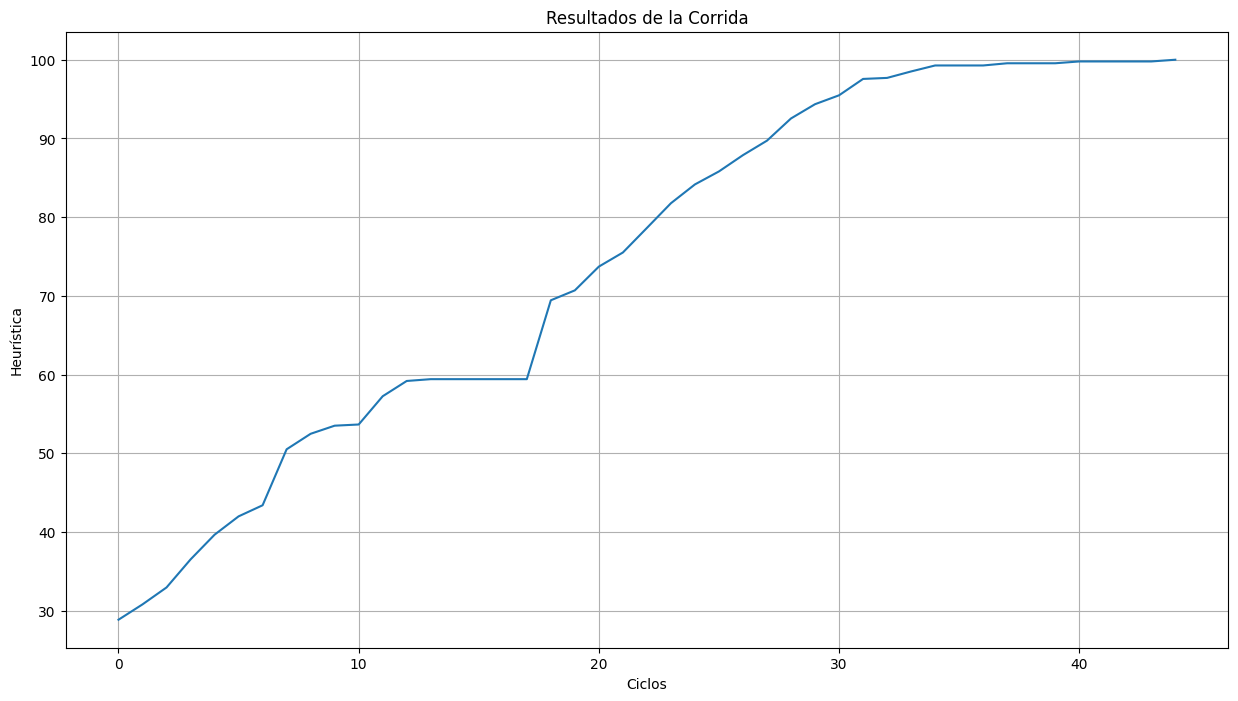

In [6]:
#@title  MOSTRAR GRAFICO DE LA CORRIDA
plt.figure(figsize=(15,8))
plt.plot(ciclosMaxAptitud)
plt.title('Resultados de la Corrida')
plt.xlabel('Ciclos')
plt.ylabel('Heurística')
plt.grid(True)
plt.show()

In [7]:
#@title MOSTRAR GRAFICO DE POSICIONES DE LAS ABEJAS CICLO x CICLO


# Librerías especiales para usar
import matplotlib as mpl
from matplotlib import animation, rc
from IPython.display import HTML

# método que se usa para generar gradiente de colores
def colorFader(c1, c2, mix=0.0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# Método que se ejecuta por cada frame para mostrar
def updatePlot(i, ciclosExplora, scat, ciclosObreras, ax, posMejorCorrida, cicloMejorCorrida):

        if ax is None or ciclosExplora is None:
            return scat,

        ax.set_xlabel('Ciclo: ' + str(i), fontsize=12)

          # Si no es el último ciclo, muestra también el global
        if i < len(ciclosExplora):

          if len(ciclosExplora[i]) > 0:

            # Hace mover a las abejas exploradoras
            scat.set_offsets(ciclosExplora[i])

          # muestra las posiciones de las abejas obreras
          # (quedan fijas)
          if len(ciclosObreras[i]) > 0:
              X, Y = zip(*ciclosObreras[i])
              ax.scatter(X, Y, color='cyan')

        if i >= cicloMejorCorrida:
          if posMejorCorrida is not None:
                ## --en Violeta: Mejor posición de las partículas
                ax.scatter(posMejorCorrida[0], posMejorCorrida[1], color='violet', s=100)

        # Devuelve una lista de "artistas" para dibujar,
        # en este caso es sólo uno por lo que se pone una coma final
        return scat,

# Función para preparar el gráfico
def PrepararGraficoAbejas(mapa, MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ, ciclosExplora, ciclosObreras, posMejorCorrida, cicloMejorCorrida, textoTitulo="", textoDesc=""):

      fig = plt.figure(figsize=(12,6), dpi=80)
      #ax = fig.add_subplot(111)
      ax = mapa.genGrafico("2D", fig, False)
      plt.close()

      # Define el tamaño de la figura
      ax.axis([MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ, MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ])

      # Separa las coordenadas x, y de las posiciones en el ciclo inicial
      X, Y = zip(*ciclosExplora[0])
      ## --en Azul: posiciones de las posiciones de cada ciclo
      scat = ax.scatter(X, Y, color='blue')

      # Muestra título y texto debajo
      ax.set_title(textoTitulo)
      #ax.set_ylabel(textoDesc, fontsize=11)

      # Luego setea la animación usando los dos métodos anteriores
      cant = len(ciclosExplora)+1
      ani = animation.FuncAnimation(fig, updatePlot,
                                    frames=cant, interval=cant,
                                    fargs=(ciclosExplora, scat, ciclosObreras, ax, posMejorCorrida, cicloMejorCorrida),
                                    blit=True, repeat=False)

      return ani

# Define la configuración para el gráfico
textoTitulo = "Movimiento de las Abejas ciclo x ciclo"
textoDesc = '\n** Posición Máximo Óptimo a buscar : ' + str(mapa.posMaximoGlobal) + ' { ' +  str(mapa.valMaximoGlobal) +' } **'
textoDesc = textoDesc + '\n== Mejor Abeja de la Corrida: ' + str(mejorAbejaCorrida.posicion) + ' { ' + str(round(mejorAbejaCorrida.heuristica, 3)) + ' } =='
textoDesc = textoDesc + '\n-- Colores:  Máximos Locales (más ROJO PEOR aptitud, y más VERDE es MEJOR aptitud) - '
textoDesc = textoDesc + '\n- Abejas Exploradoras (AZUL) - Abejas Obreras (CELESTE) - Mejor Ubicación de Abeja (VIOLETA) -- '

# Prepara el gráfico
ani = PrepararGraficoAbejas(mapa, MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ, ciclosAbejas, ciclosObreras, mejorAbejaCorrida.posicion, mejorAbejaCorrida_ciclo, textoTitulo, textoDesc)

# Nota: esto se agega para que funcione en Google Colab
rc('animation', html='jshtml')
display(ani)
print(textoDesc)


** Posición Máximo Óptimo a buscar : [100, 100] { 100 } **
== Mejor Abeja de la Corrida: [100, 100] { 100.0 } ==
-- Colores:  Máximos Locales (más ROJO PEOR aptitud, y más VERDE es MEJOR aptitud) - 
- Abejas Exploradoras (AZUL) - Abejas Obreras (CELESTE) - Mejor Ubicación de Abeja (VIOLETA) -- 
